In [49]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pathlib
from tensorflow.keras.utils import to_categorical, plot_model, image_dataset_from_directory
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
normal = pathlib.Path("../input/eye-diseases-classification/dataset/normal")
glaucoma = pathlib.Path("../input/eye-diseases-classification/dataset/glaucoma")
retinopathy = pathlib.Path("../input/eye-diseases-classification/dataset/diabetic_retinopathy")
cataract = pathlib.Path("../input/eye-diseases-classification/dataset/cataract")


In [51]:
images_dict = {"normal": list(normal.glob("*.jpg")),
              "glaucoma": list(glaucoma.glob("*.jpg")),
              "diabetic_retinopathy":list(retinopathy.glob("*.jpg")),
              "cataract":list(cataract.glob("*.jpg"))}
labels_dict = {
    "normal":0, "glaucoma":1, "diabetic_retinopathy":2, "cataract":3
}

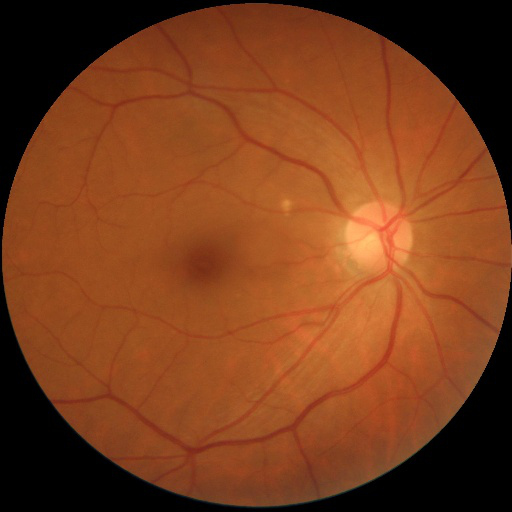

In [52]:
import PIL
PIL.Image.open(str(images_dict["normal"][200]))

In [53]:
import cv2
X, y = [], []
for label, images in images_dict.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (180, 180))
        if image is not None:
            X.append(image) 
            y.append(labels_dict[label]) 
X, y = np.array(X)/255.0, np.array(y)


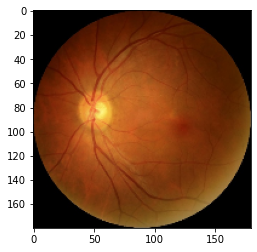

In [55]:
plt.imshow(X[1])
plt.show()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [146]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [147]:
train_cat_labels = to_categorical(y_train)
train_cat_labels.shape, train_cat_labels.dtype

((2626, 4), dtype('float32'))

In [148]:
X_train.shape, X_train.dtype ,train_cat_labels.shape, train_cat_labels.dtype

((2626, 180, 180, 3), dtype('float32'), (2626, 4), dtype('float32'))

In [149]:
y_test.shape

(292,)

In [150]:
X_train.shape

(2626, 180, 180, 3)

In [151]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.7)
])

In [155]:
#LENET-5
model = keras.models.Sequential()
model.add(data_argumentation)
model.add(keras.layers.Conv2D(6,(5,5), input_shape=(180, 180, 3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2), strides=2))
model.add(keras.layers.Conv2D(16,(5,5), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2), strides=2))
model.add(keras.layers.Conv2D(120,(5,5), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))


In [156]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [158]:
model.fit(X_train,y_train,epochs=95,batch_size=32,
          validation_split=0.15)

Epoch 1/95
70/70 [==============================] - 30s 423ms/step - loss: 0.6906 - accuracy: 0.7030 - val_loss: 0.6114 - val_accuracy: 0.7259
Epoch 2/95
70/70 [==============================] - 29s 416ms/step - loss: 0.6876 - accuracy: 0.6962 - val_loss: 0.6013 - val_accuracy: 0.7437
Epoch 3/95
70/70 [==============================] - 30s 435ms/step - loss: 0.6980 - accuracy: 0.7056 - val_loss: 0.6189 - val_accuracy: 0.7360
Epoch 4/95
70/70 [==============================] - 30s 424ms/step - loss: 0.7003 - accuracy: 0.6949 - val_loss: 0.5846 - val_accuracy: 0.7284
Epoch 5/95
70/70 [==============================] - 29s 417ms/step - loss: 0.6849 - accuracy: 0.7101 - val_loss: 0.5611 - val_accuracy: 0.7589
Epoch 6/95
70/70 [==============================] - 29s 420ms/step - loss: 0.6738 - accuracy: 0.7016 - val_loss: 0.5577 - val_accuracy: 0.7563
Epoch 7/95
70/70 [==============================] - 29s 415ms/step - loss: 0.6567 - accuracy: 0.7186 - val_loss: 0.6662 - val_accuracy: 0.7107

In [159]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 70ms/step - loss: 0.4290 - accuracy: 0.8185


[0.4290391206741333, 0.818493127822876]